In [1]:
import numpy as np
import pandas as pd

from requests import get
from bs4 import BeautifulSoup

import re

import os
import json

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w

np.random.seed(123)

In [2]:
df = a.get_data_json()

In [3]:
df.head()

,repo,language,readme_contents
0,DroidPluginTeam/DroidPlugin,Java,Droid Plugin\r\n======\r\n\r\n[中文文档](readme_cn...
1,angular-app/angular-app,JavaScript,[![Build Status](https://secure.travis-ci.org/...
2,doctrine/event-manager,PHP,# Doctrine Event Manager\n\n[![Build Status](h...
3,huluoyang/freecodecamp.cn,JavaScript,![](https://s3.amazonaws.com/freecodecamp/wide...
4,spolu/breach_core,JavaScript,### Breach: A Browser for the HTML5 Era\n\n**M...


In [4]:
df = w.clean_df(df)

In [5]:
df.head()

,repo,language,readme_contents,lemmatized,readme_length
0,DroidPluginTeam/DroidPlugin,Java,Droid Plugin\r\n======\r\n\r\n[中文文档](readme_cn...,droid plugin readmecnmd fllow githubhttpsgithu...,4295
1,angular-app/angular-app,JavaScript,[![Build Status](https://secure.travis-ci.org/...,build statushttpssecuretravisciorgangularappan...,8907
2,doctrine/event-manager,other,# Doctrine Event Manager\n\n[![Build Status](h...,doctrine event manager build statushttpsgithub...,840
3,huluoyang/freecodecamp.cn,JavaScript,![](https://s3.amazonaws.com/freecodecamp/wide...,httpss3amazonawscomfreecodecampwidesocialbanne...,3267
4,spolu/breach_core,JavaScript,### Breach: A Browser for the HTML5 Era\n\n**M...,breach browser html5 era modular everything br...,1069


In [6]:
train, validate, test = w.split_data(df, 'language')

In [7]:
train.head()

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


# Explore readme_length vs language
## Is readme_length associated with language?

## Visualize

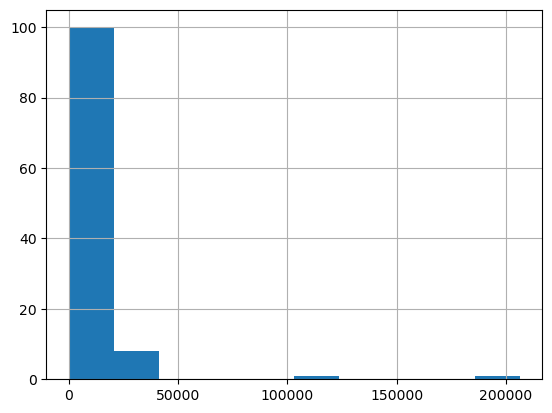

In [8]:
# first plot distribution of readme_length
df.readme_length.hist()
plt.show()

In [9]:
# there are two entries with readme_lengths that are way above normal;
# both have 'other' as their language
df[df.readme_length > 50000].head()

,repo,language,readme_contents,lemmatized,readme_length
24,laurent22/joplin,other,<!-- DONATELINKS -->\n[![Donate using PayPal](...,donatelinks donate using paypalhttpsrawgithubu...,107471
26,rust-unofficial/awesome-rust,other,# Awesome Rust [![build badge](https://github....,awesome rust build badgehttpsgithubcomrustunof...,206311


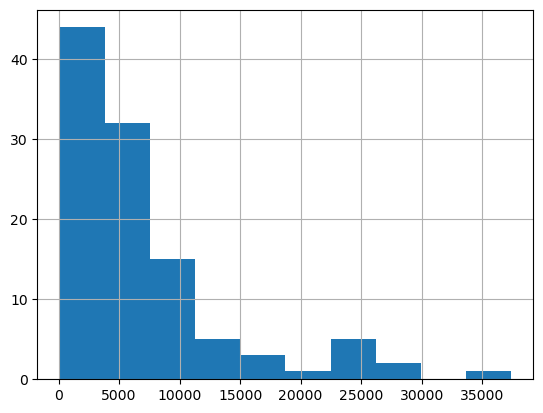

In [10]:
# now plot distribution of readme_length without the two outliers
df[df.readme_length<50000].readme_length.hist()
plt.show()

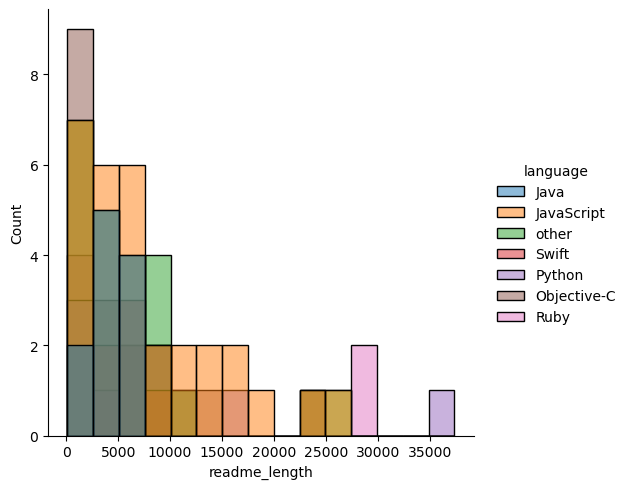

In [11]:
# make a histplot hued by language to visualize if readme_length is related to language at all
sns.displot(data=df[df.readme_length<50000],x='readme_length', hue='language', kind='hist') 
plt.show()

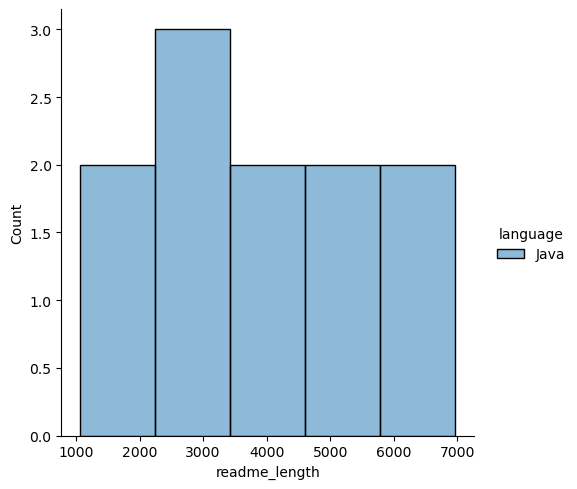

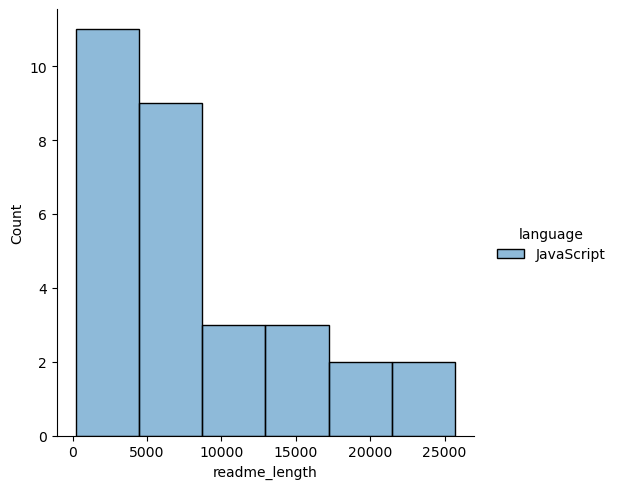

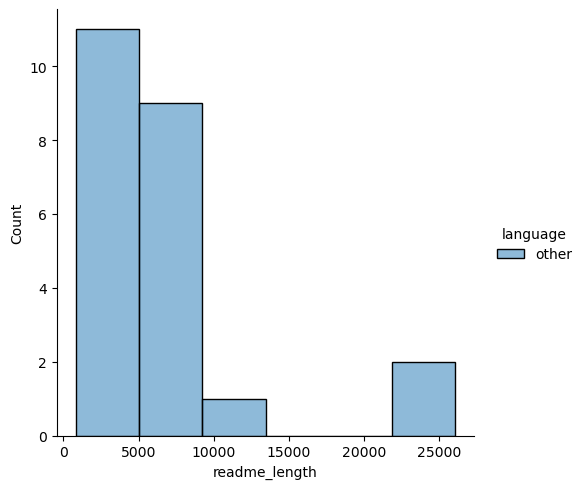

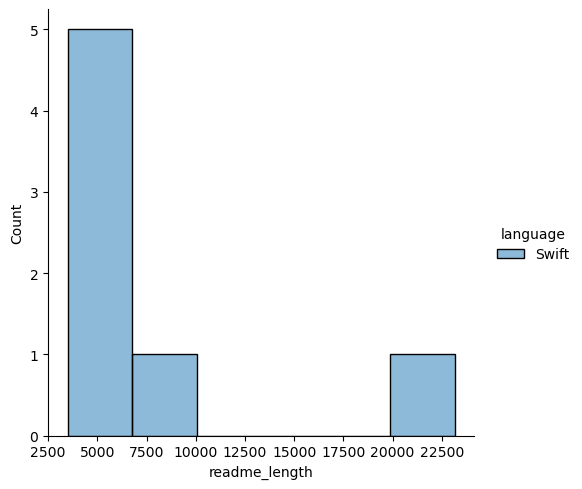

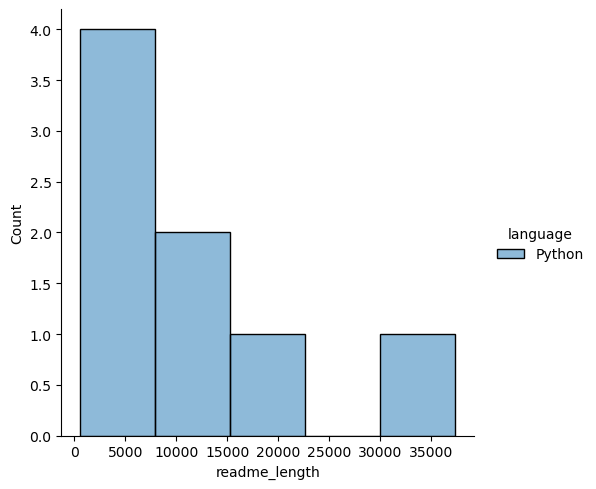

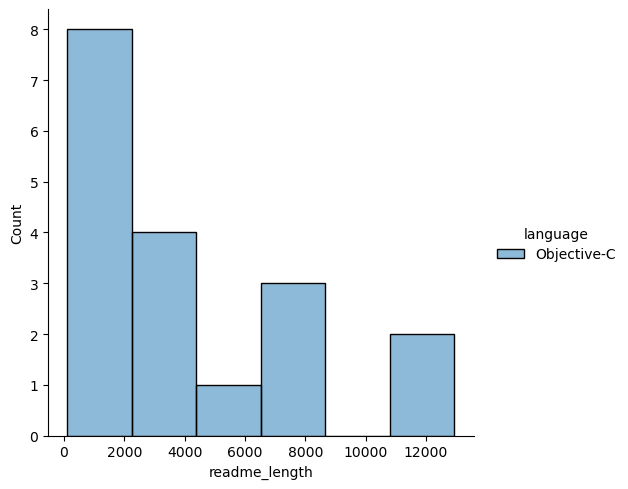

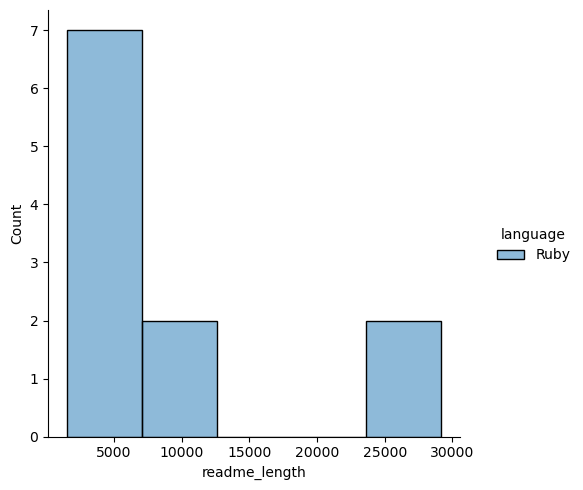

In [12]:
# the plot with everything on top of each other wasn't very useful, so
# plot histplots of readme_length separately for each language
for l in df.language.unique():
    sns.displot(data=df[(df.readme_length<50000) & (df.language == l)],x='readme_length', hue='language', kind='hist') 
    plt.show()

In [13]:
# It doesn't look like this is going to be a useful factor in determining language,
# but let's test it with statistics

### Analyze readme_length vs language with statistics
- $H_0$ There is NO relationship between readme_length and language
- $H_a$ There IS a relationship
- $\alpha$ = .05
continuous vs categorical, not normally distributed, comparing subgroup means to each other
=> mann whitney test

In [14]:
# get stats import
import scipy.stats as stats

In [15]:
# get combinations import for iteration
from itertools import combinations

# mannwhitneyu requires two array-like inputs, so this will iterate over all possible combinations of
# two different languages to test if there is a correlation
for combo in combinations(df.language.unique(), 2):  # 2 for pairs, 3 for triplets, etc
    print(combo)
    print(stats.mannwhitneyu(df[df.language == combo[0]].readme_length, df[df.language == combo[1]].readme_length))

# BOTTOM LINE: only one combination had a p-value < .05 (JavaScript and Objective-C)

('Java', 'JavaScript')
MannwhitneyuResult(statistic=112.0, pvalue=0.12238176661381711)
('Java', 'other')
MannwhitneyuResult(statistic=105.0, pvalue=0.2717948879571903)
('Java', 'Swift')
MannwhitneyuResult(statistic=20.0, pvalue=0.10419808949220714)
('Java', 'Python')
MannwhitneyuResult(statistic=33.0, pvalue=0.3950411473631288)
('Java', 'Objective-C')
MannwhitneyuResult(statistic=117.0, pvalue=0.43142218968707247)
('Java', 'Ruby')
MannwhitneyuResult(statistic=46.0, pvalue=0.35766176977222996)
('JavaScript', 'other')
MannwhitneyuResult(statistic=399.0, pvalue=0.6911981085861325)
('JavaScript', 'Swift')
MannwhitneyuResult(statistic=99.0, pvalue=0.8310980477007505)
('JavaScript', 'Python')
MannwhitneyuResult(statistic=120.0, pvalue=1.0)
('JavaScript', 'Objective-C')
MannwhitneyuResult(statistic=371.0, pvalue=0.03232158551107478)
('JavaScript', 'Ruby')
MannwhitneyuResult(statistic=166.0, pvalue=0.9882602146633384)
('other', 'Swift')
MannwhitneyuResult(statistic=74.0, pvalue=0.5616318701691

### Summarize readme_length vs language

- p is > .05, in all combinations except one, so we CANNOT reject the null hypothesis 
- In summary, there is no association between readme_length and language

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Number of mislabeled points out of a total 75 points : 4

# Copied Keila's exploring to work with

In [16]:
df.head()

,repo,language,readme_contents,lemmatized,readme_length
0,DroidPluginTeam/DroidPlugin,Java,Droid Plugin\r\n======\r\n\r\n[中文文档](readme_cn...,droid plugin readmecnmd fllow githubhttpsgithu...,4295
1,angular-app/angular-app,JavaScript,[![Build Status](https://secure.travis-ci.org/...,build statushttpssecuretravisciorgangularappan...,8907
2,doctrine/event-manager,other,# Doctrine Event Manager\n\n[![Build Status](h...,doctrine event manager build statushttpsgithub...,840
3,huluoyang/freecodecamp.cn,JavaScript,![](https://s3.amazonaws.com/freecodecamp/wide...,httpss3amazonawscomfreecodecampwidesocialbanne...,3267
4,spolu/breach_core,JavaScript,### Breach: A Browser for the HTML5 Era\n\n**M...,breach browser html5 era modular everything br...,1069


In [18]:
df.language.unique()

array(['Java', 'JavaScript', 'other', 'Swift', 'Python', 'Objective-C',
       'Ruby'], dtype=object)

In [25]:
# join words from all language categories together into one string, then split into list of words
java_words = ' '.join(df[df.language == 'Java'].lemmatized).split()
javascript_words = ' '.join(df[df.language == 'JavaScript'].lemmatized).split()
other_words = ' '.join(df[df.language == 'other'].lemmatized).split()
swift_words = ' '.join(df[df.language == 'Swift'].lemmatized).split()
python_words = ' '.join(df[df.language == 'Python'].lemmatized).split()
objectivec_words = ' '.join(df[df.language == 'Objective-C'].lemmatized).split()
ruby_words = ' '.join(df[df.language == 'Ruby'].lemmatized).split()
all_words = ' '.join(df.lemmatized).split()

In [24]:
java_words[:5]

['droid', 'plugin', 'readmecnmd', 'fllow', 'githubhttpsgithubcomcmzy']

In [26]:
# get a series of value counts for each of language categories plus all words
java_freq = pd.Series(java_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
swift_freq = pd.Series(swift_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
objectivec_freq = pd.Series(objectivec_words).value_counts()
ruby_freq = pd.Series(ruby_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [27]:
java_freq.head()

android    38
license    36
app        29
style      27
project    26
dtype: int64

In [28]:
# combine freq series into a dataframe called word_counts
word_counts = pd.concat([all_freq, java_freq, javascript_freq, other_freq
                        , swift_freq, python_freq, objectivec_freq, ruby_freq], axis = 1, sort=True)
# fill na with 0
word_counts = word_counts.fillna(0)
# make values integers instead of floats
word_counts = word_counts.apply(lambda s: s.astype(int))
# rename the columns
word_counts.columns = ['all', 'java', 'javascript', 'other', 'swift', 'python', 'objective_c', 'ruby']
word_counts.head()

,all,java,javascript,other,swift,python,objective_c,ruby
0,48,2,12,17,2,2,11,2
00,4,0,0,0,0,3,1,0
000,4,0,0,4,0,0,0,0
0000,1,0,0,0,0,0,0,1
0000000726752f82af3d0f271fd61337035256051a9a1e5881e82d93d8e42d66,1,0,0,0,0,1,0,0


In [32]:
# What are most common words for each category/column
for col in word_counts.columns:
    print(f'Top 5 words in {col}')
    display(word_counts.sort_values(by=col, ascending=False).head())

Top 5 words in all


,all,java,javascript,other,swift,python,objective_c,ruby
img,552,10,34,468,25,6,6,3
rust,453,0,0,451,0,2,0,0
width50,388,0,0,387,0,0,1,0
use,376,21,106,90,23,47,35,54
build,348,23,61,240,5,5,6,8


Top 5 words in java


,all,java,javascript,other,swift,python,objective_c,ruby
android,58,38,6,13,1,0,0,0
license,150,36,22,37,8,7,28,12
app,155,29,54,21,17,1,14,19
style,92,27,21,15,14,5,8,2
project,217,26,61,56,25,12,21,16


Top 5 words in javascript


,all,java,javascript,other,swift,python,objective_c,ruby
use,376,21,106,90,23,47,35,54
option,159,0,101,23,0,11,5,19
html,145,0,97,38,0,1,0,9
run,206,11,91,51,7,14,4,28
name,195,2,87,16,1,15,7,67


Top 5 words in other


,all,java,javascript,other,swift,python,objective_c,ruby
img,552,10,34,468,25,6,6,3
rust,453,0,0,451,0,2,0,0
width50,388,0,0,387,0,0,1,0
build,348,23,61,240,5,5,6,8
library,242,15,10,185,20,2,8,2


Top 5 words in swift


,all,java,javascript,other,swift,python,objective_c,ruby
true,225,3,39,13,131,1,1,37
type,168,0,31,18,82,6,7,24
author,109,0,5,9,81,3,5,6
carthage,84,0,0,0,80,0,4,0
detail,119,3,14,10,79,6,3,4


Top 5 words in python


,all,java,javascript,other,swift,python,objective_c,ruby
cheat,62,0,0,1,0,60,1,0
sheet,57,0,0,0,0,57,0,0
use,376,21,106,90,23,47,35,54
repository,90,12,9,13,1,40,2,13
query,79,0,3,15,0,39,1,21


Top 5 words in objective_c


,all,java,javascript,other,swift,python,objective_c,ruby
cell,54,0,0,0,3,0,51,0
view,115,15,17,9,28,0,41,5
subliminal,39,0,0,0,0,0,39,0
property,101,2,16,7,12,1,35,28
use,376,21,106,90,23,47,35,54


Top 5 words in ruby


,all,java,javascript,other,swift,python,objective_c,ruby
end,248,0,9,14,2,4,1,218
ruby,152,0,2,11,1,2,4,132
order,149,1,5,15,0,4,4,120
example,265,4,70,46,18,14,14,99
user,223,5,49,39,10,12,17,91


In [36]:
languages = word_counts.columns[1:]
languages

Index(['java', 'javascript', 'other', 'swift', 'python', 'objective_c',
       'ruby'],
      dtype='object')

In [53]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

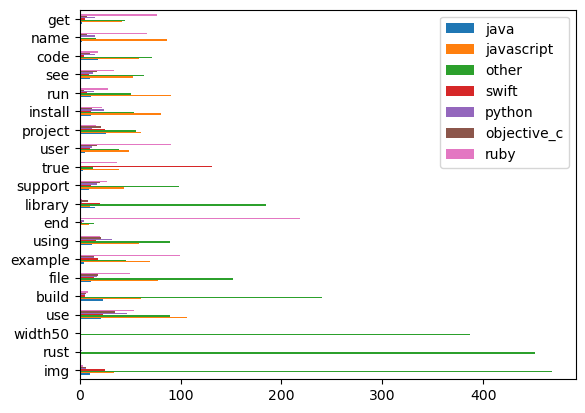

In [37]:
# visualization of top 20 words and ham vs spam
word_counts.sort_values('all', ascending=False)[languages].head(20).plot.barh()
plt.show()

# The two outliers are having an outsize effect I think. I think we need to remove them.

In [38]:
# prep for a different plot: get percentage of ham/spam vs all for top 20 words
word_counts.sort_values('all', ascending=False).head(20)\
.apply(lambda row: row/row['all'], axis=1)

,all,java,javascript,other,swift,python,objective_c,ruby
img,1.0,0.018116,0.061594,0.847826,0.045290,0.010870,0.010870,0.005435
rust,1.0,0.000000,0.000000,0.995585,0.000000,0.004415,0.000000,0.000000
width50,1.0,0.000000,0.000000,0.997423,0.000000,0.000000,0.002577,0.000000
use,1.0,0.055851,0.281915,0.239362,0.061170,0.125000,0.093085,0.143617
build,1.0,0.066092,0.175287,0.689655,0.014368,0.014368,0.017241,0.022989
file,1.0,0.032353,0.229412,0.447059,0.041176,0.050000,0.052941,0.147059
example,1.0,0.015094,0.264151,0.173585,0.067925,0.052830,0.052830,0.373585
using,1.0,0.048000,0.236000,0.360000,0.064000,0.128000,0.084000,0.080000
end,1.0,0.000000,0.036290,0.056452,0.008065,0.016129,0.004032,0.879032
library,1.0,0.061983,0.041322,0.764463,0.082645,0.008264,0.033058,0.008264


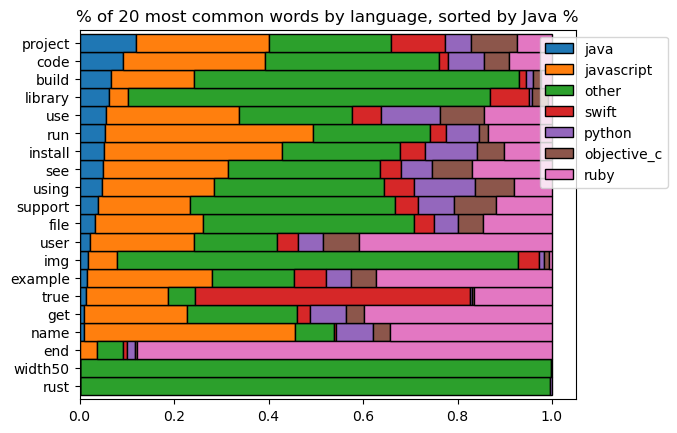

In [40]:
(word_counts.sort_values('all', ascending=False).head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values('java')
.plot.barh(stacked=True, width=1, ec='black')
)

plt.title('% of 20 most common words by language, sorted by Java %')
# put legend outside of plot
plt.legend(bbox_to_anchor=(1.2, 1.0), loc='upper right')
plt.show()

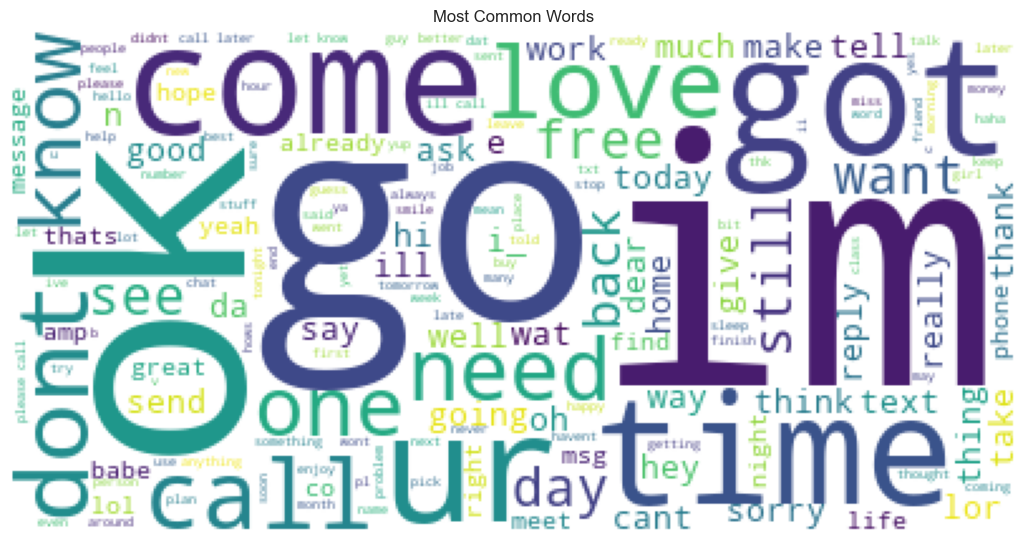

In [76]:
# generate some word clouds - start with single words
all_cloud = WordCloud(background_color='white').generate(' '.join(all_words))
plt.imshow(all_cloud)
plt.axis('off')
plt.title('Most Common Words')
plt.show()

## Question 0 Are there any words that uniquely identify a programming language?
- NOTE: this question is more of a look at the data, not a stats test question

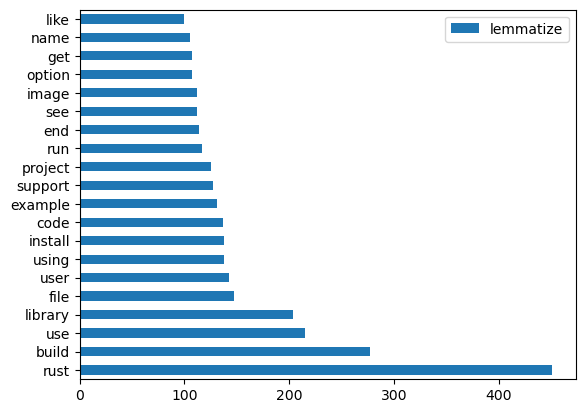

In [8]:
# Example: # get a boxplot and histplot of property_value of train
# Visualize Example: # get a regplot of squarefeet vs property_value on train
word_counts.sort_values("lemmatize", ascending=False)[["lemmatize"]].head(20).plot.barh();



* `pure, rust`, `rust, build` rust is a library for C language, which leads me to objective-c
* `install npm` npm is a package manager for the JavaScript programming language
* `library ruby` ruby is a language 

## Question 1 Are there bigrams or n-grams that can uniquely identify a programming language?

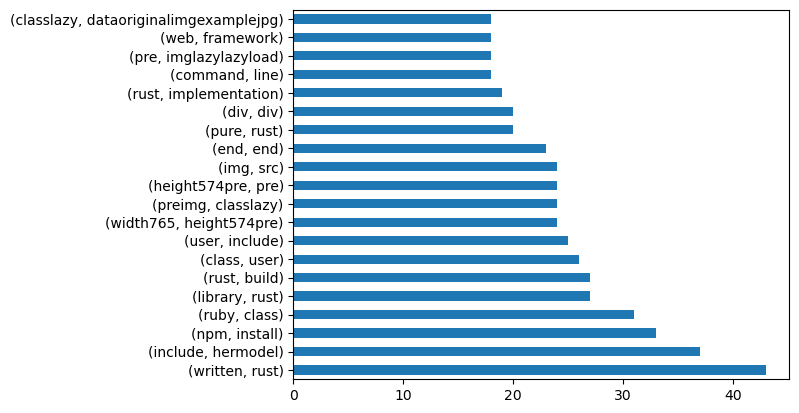

In [9]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train

ke.make_ngram(git_lem_words, 2).head(20).plot.barh();

In [13]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', 100)